##### Advanced Regression Assignment
###### House Price Prediction

The assignment would be solved using following steps

1. Data undestanding
2. Data cleaninsing
3. Model Building
4. Lasso and Ridge regression
5. Final Evaluation

In [232]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warning
import warnings
warnings.filterwarnings('ignore')

In [233]:
#read the housing file
house = pd.read_csv('train.csv')

In [234]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [235]:
#shape
house.shape

(1460, 81)

In [236]:
#check dataset info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Step 1: Data undestanding

######  Data disctionary
1. MSSubClass: Identifies the type of dwelling involved in the sale : Categorical
2. MSZoning: Identifies the general zoning classification of the sale. : Categorica
3. LotFrontage: Linear feet of street connected to property :numeric
4. LotArea: Lot size in square feet :numeric
5. Street: Type of road access to property :categorical
6. Alley: Type of alley access to property : Categorical
7. LotShape: General shape of property : Categorical
8. LandContour: Flatness of the property : Categorical
9. Utilities: Type of utilities available : Categorical
10. LotConfig: Lot configuration : Categorical
11. LandSlope: Slope of property : Categorical
12. Neighborhood: Physical locations within Ames city limits :Categorical
13. Condition1: Proximity to various conditions :Categorical
14. Condition2: Proximity to various conditions (if more than one is present) :Categorical
15. BldgType: Type of dwellin15.  :Categorical
16. HouseStyle: Style of dwelling :Categorical
17. OverallQual: Rates the overall material and finish of the house :Categorical
18. OverallCond: Rates the overall condition of the house :Categorical
19. YearBuilt: Original construction date
20. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
21. RoofStyle: Type of roof :Categorical
22. RoofMatl: Roof material :Categorical
23. Exterior1st: Exterior covering on house :Categorical
24. Exterior2nd: Exterior covering on house (if more than one material) :Categorical
25. MasVnrType: Masonry veneer type :Categorical
26. MasVnrArea: Masonry veneer area in square feet
26. ExterQual: Evaluates the quality of the material on the exterior 
27. ExterCond: Evaluates the present condition of the material on the exterior
28. Foundation: Type of foundation :Categorical
29. BsmtQual: Evaluates the height of the basement :Categorical
30. BsmtCond: Evaluates the general condition of the basement :Categorical
31. BsmtExposure: Refers to walkout or garden level walls :Categorical
32. BsmtFinType1: Rating of basement finished area :Categorical
33. BsmtFinSF1: Type 1 finished square feet
34. BsmtFinType2: Rating of basement finished area (if multiple types) :Categorical
35. BsmtFinSF2: Type 2 finished square feet
36. BsmtUnfSF: Unfinished square feet of basement area
37. TotalBsmtSF: Total square feet of basement area
38. Heating: Type of heating :Categorical
39. HeatingQC: Heating quality and condition :Categorical
40. CentralAir: Central air conditioning :Categorical
41. Electrical: Electrical system :Categorical
42. 1stFlrSF: First Floor square feet
43. 2ndFlrSF: Second floor square feet
44. LowQualFinSF: Low quality finished square feet (all floors)
45. GrLivArea: Above grade (ground) living area square feet
46. BsmtFullBath: Basement full bathrooms
47. BsmtHalfBath: Basement half bathrooms
48. FullBath: Full bathrooms above grade
49. HalfBath: Half baths above grade
50. Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
51. kitchen: Kitchens above grade
52. KitchenQual: Kitchen quality :Categorical
53. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
54. Functional: Home functionality (Assume typical unless deductions are warranted) :Categorical
55. Fireplaces: Number of fireplaces
56. FireplaceQu: Fireplace quality
57. GarageType: Garage location :Categorical
58. GarageYrBlt: Year garage was built		
59. GarageFinish: Interior finish of the garage :Categorical
60. GarageCars: Size of garage in car capacity :Numeric
61. GarageArea: Size of garage in square feet :Numeric
62. GarageQual: Garage quality  :Categorical
63. GarageCond: Garage condition :Categorical
64. PavedDrive: Paved driveway :Categorical
65. WoodDeckSF: Wood deck area in square feet :Numeric
66. OpenPorchSF: Open porch area in square feet :Numeric
67. EnclosedPorch: Enclosed porch area in square feet :Numeric
68. 3SsnPorch: Three season porch area in square feet :Numeric
69. ScreenPorch: Screen porch area in square feet :Numeric
70. PoolArea: Pool area in square feet :Numeric
71. PoolQC: Pool quality :Categorical
72. Fence: Fence quality :Categorical
73. MiscFeature: Miscellaneous feature not covered in other categories :Categorical
74. MiscVal: $Value of miscellaneous feature :Numeric
75. MoSold: Month Sold (MM) :Numeric
76. YrSold: Year Sold (YYYY) : NUmeric
77. SaleType: Type of sale :Categorical
78. SaleCondition: Condition of sale :Categorical

In [237]:
#Few of the categorical columns are treated as numeric-> letus first convert them, before plotting the data
house[['MSSubClass', 'OverallQual', 'OverallCond']]=house[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')


In [238]:
#drop the ID column
house=house.drop('Id', axis=1)

In [239]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [240]:
#Scatter plot all numeric variables versus the Sale Price
house_numeric = house.select_dtypes(exclude=['object'])
print(len(house_numeric.columns))

34


In [241]:
print(house_numeric['LowQualFinSF'])

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LowQualFinSF, Length: 1460, dtype: int64


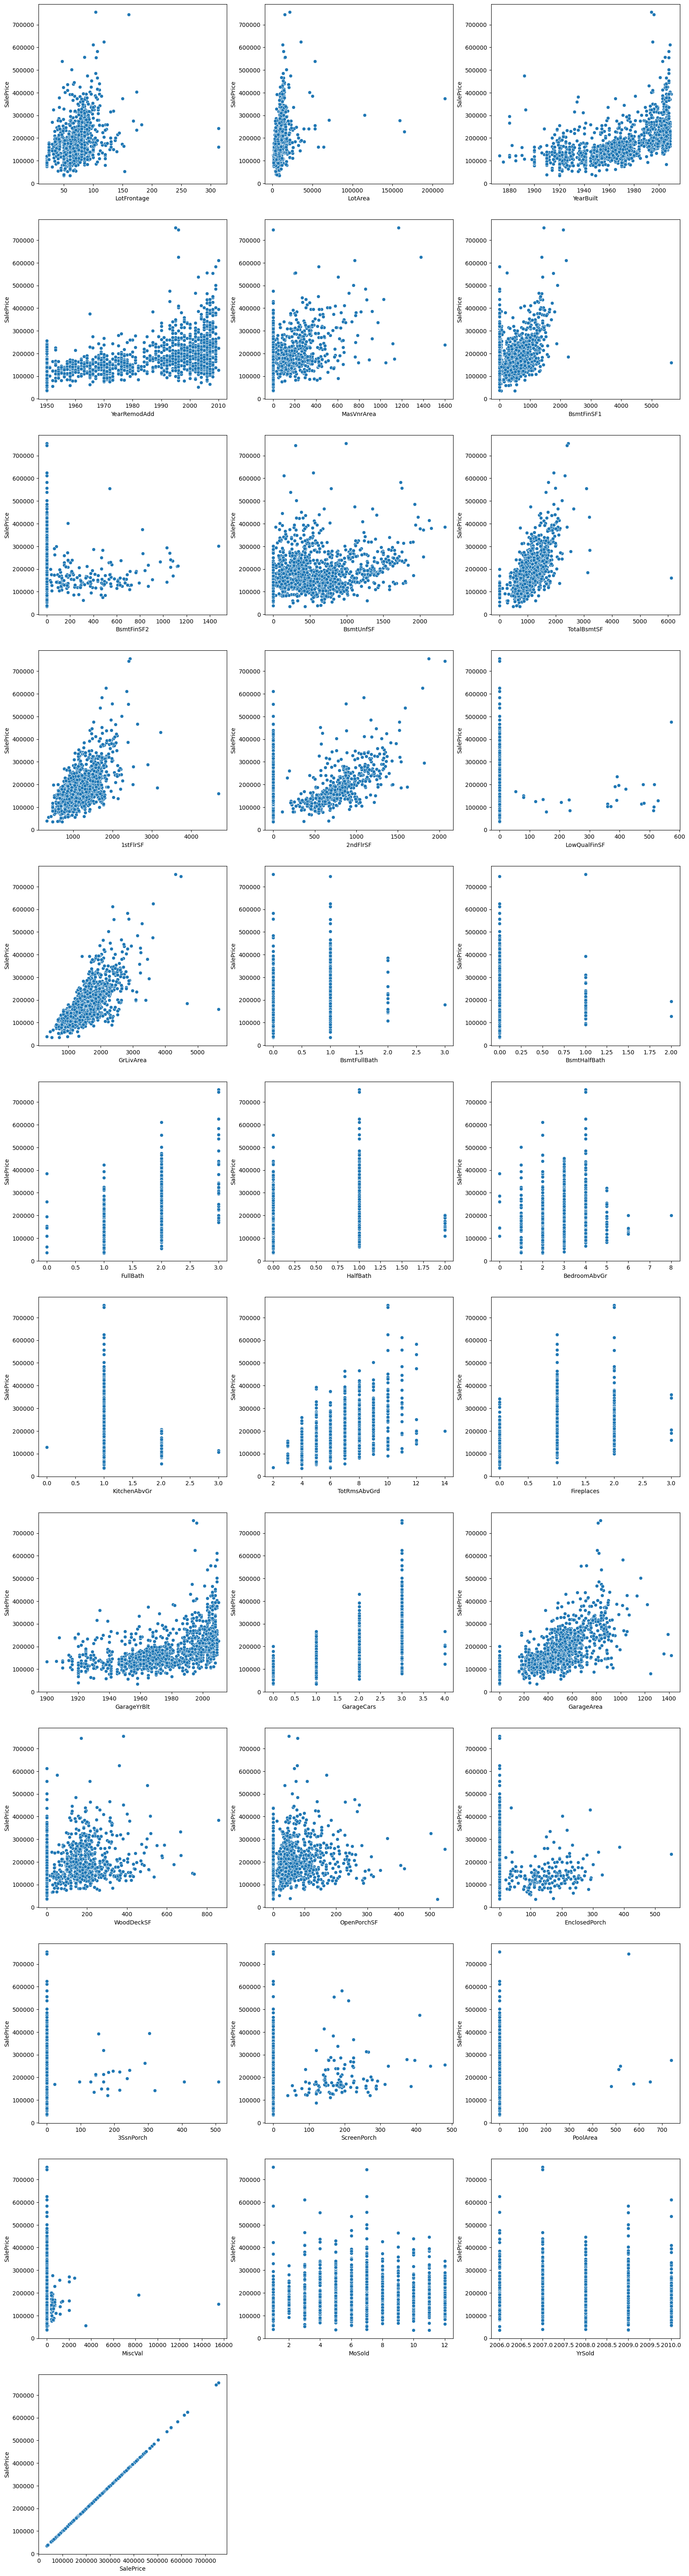

In [242]:
#lets plot all numerical variables vs Sales price
plt.figure(figsize=(20,80))
count=1
for i in house_numeric.columns:
    plt.subplot(12,3,count)
    sns.scatterplot(data=house, x=i , y='SalePrice')
    plt.ylabel('SalePrice')
    plt.xlabel(i)
    count+=1


###### Observations:
1. There are certain variables like 1stFlrSF, GrLivArea- etc, that have linear relation with Sales price
2. Multiple variable like- lot area, BsmtFN1/2, etc- do not look like has any impact on pricing
3. Certain correlation exist between sale price and other columns- e.g., year built-> price incerases with year built 
4.  Outliers-> LotArea, GrLivArea,GarageArea,TotalBsmtSF

In [243]:
#now lets plot categorical variable into box plots
house_categorical = house.select_dtypes(include=['object'])
print(len(house_categorical.columns))

46


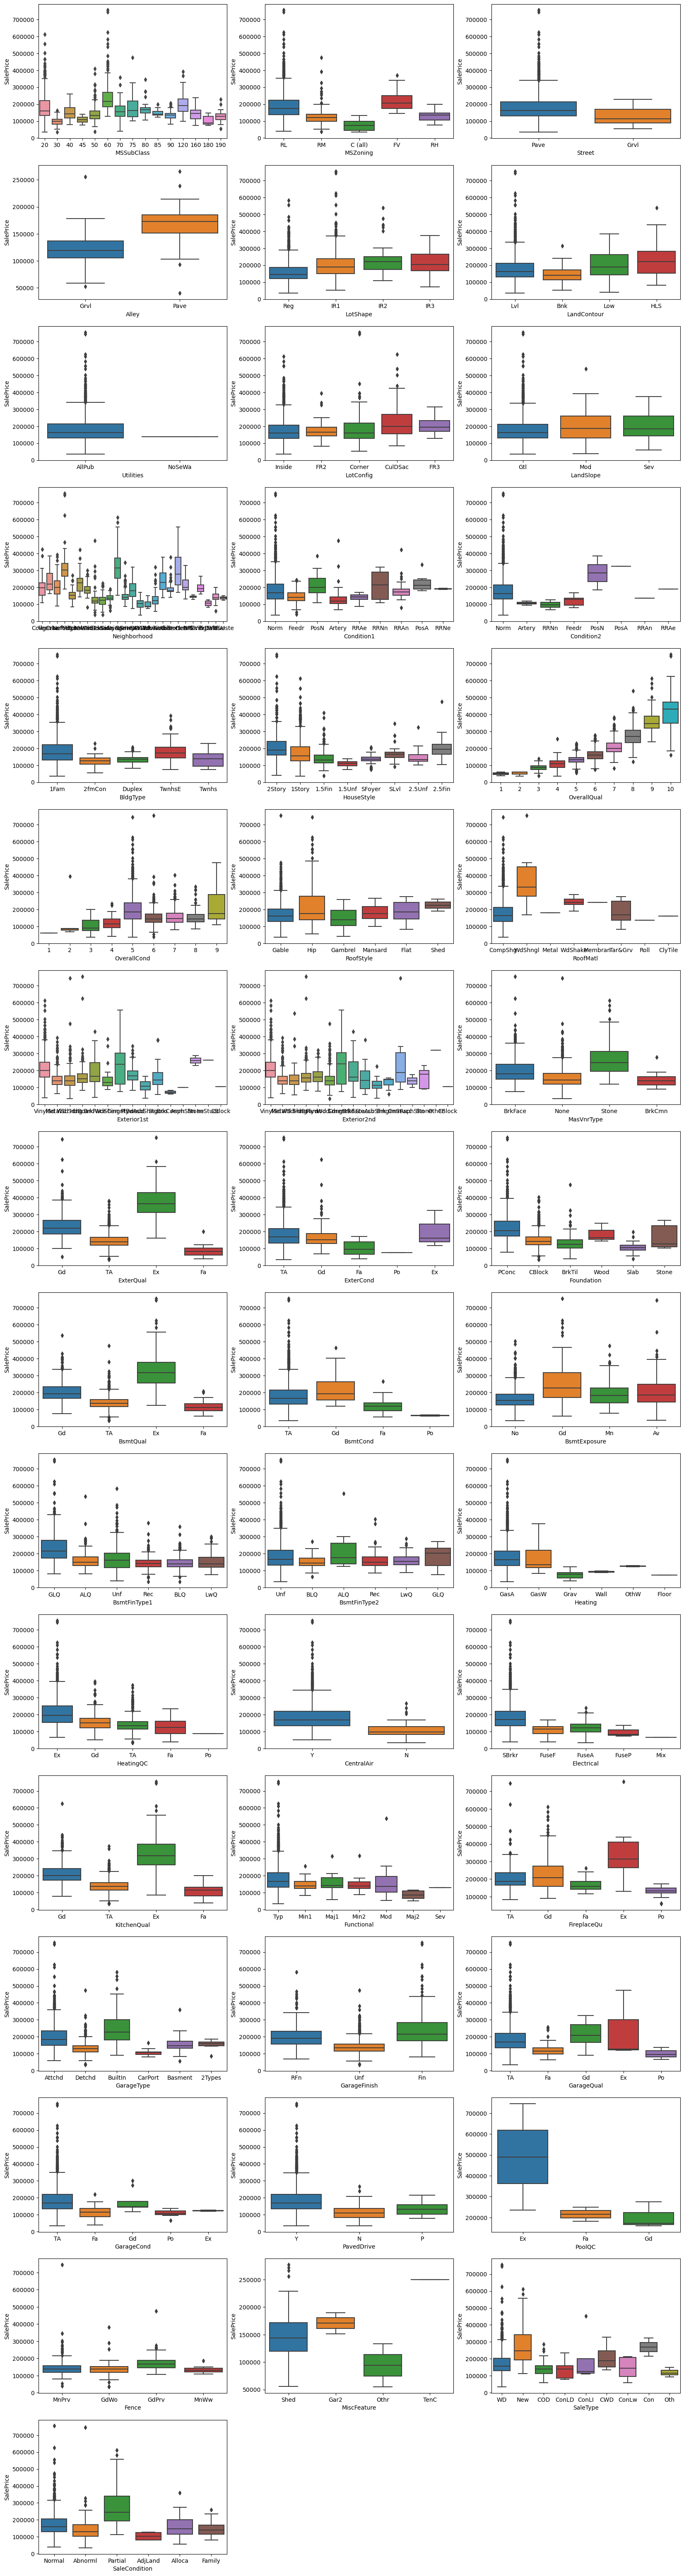

In [244]:
plt.figure(figsize=(20,80))
count=1
for i in house_categorical.columns:
    plt.subplot(16,3,count)
    sns.boxplot(x=i, y='SalePrice', data=house)
    count+=1

###### Observations
1. MsSubClass 60 has higher price compared to others
2. paved alley tend to increase sale price
3. Neighbourhood seem to have a impact on sale price- few neighbourhoods are sighnificantly higher than others
4. Basement quality-> excellent basement quality increases the sale price

In [245]:
#next lets plot a correlation matrix
# correlation matrix
cor = house_numeric.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


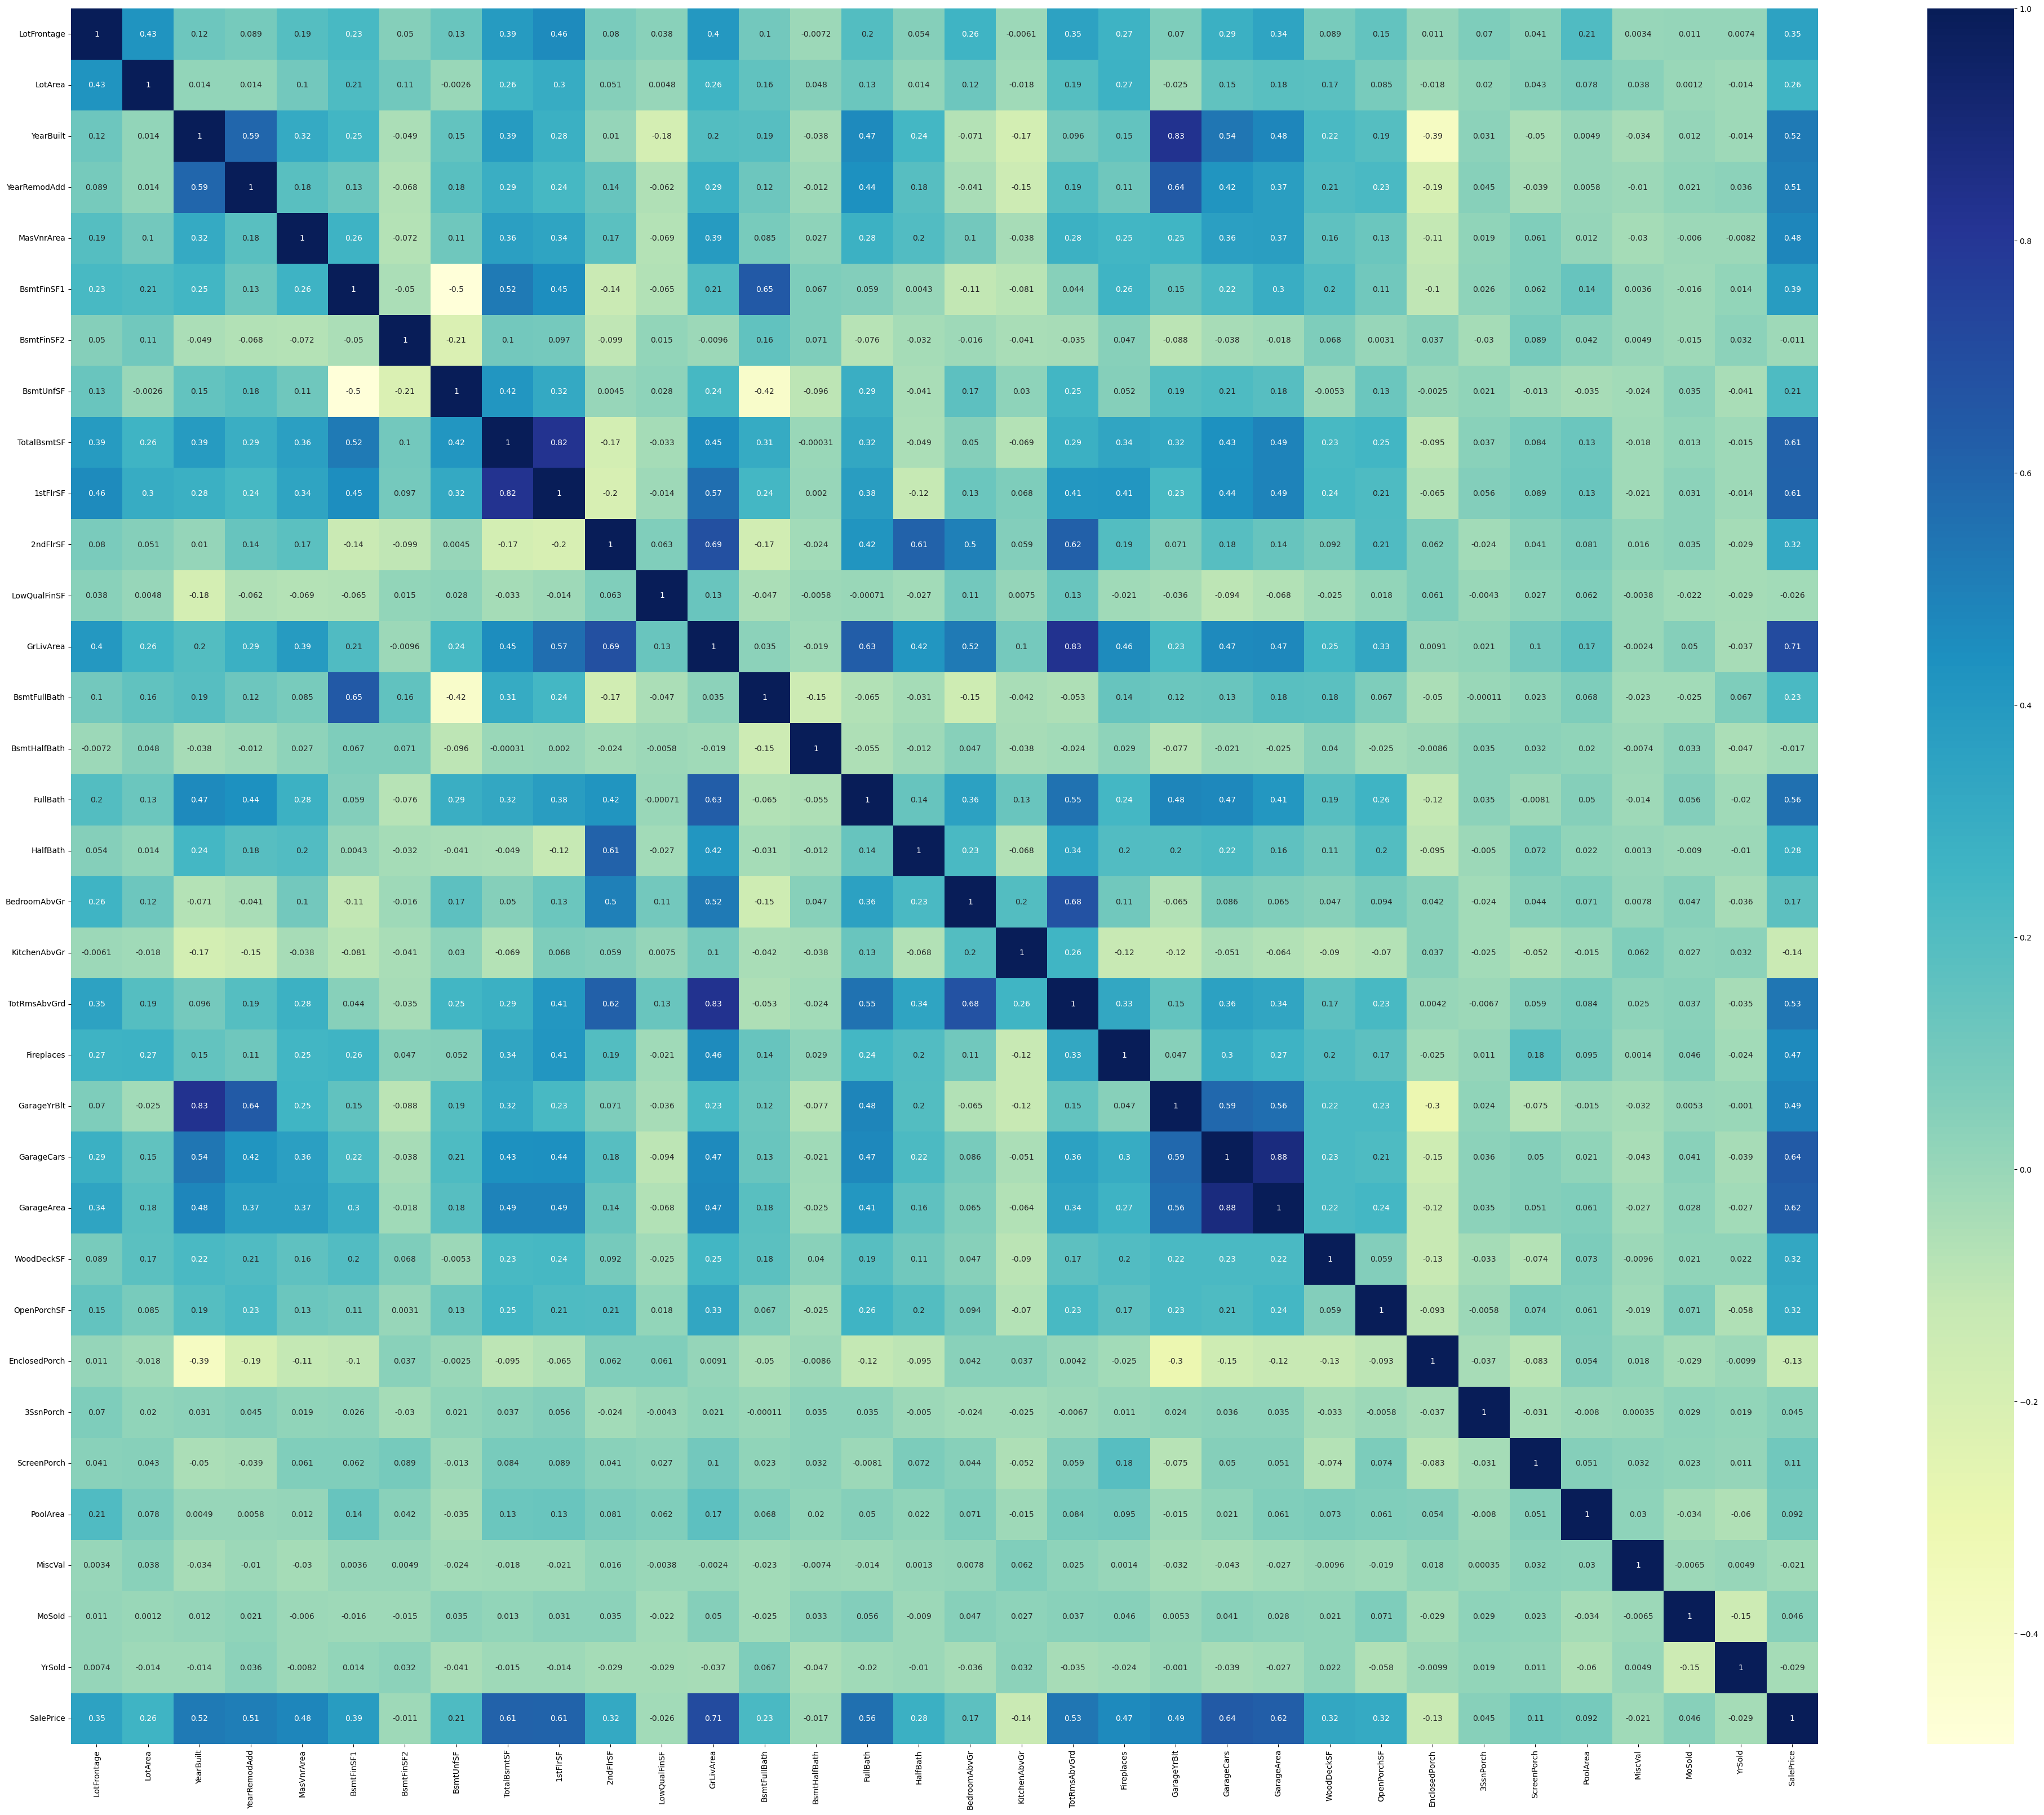

In [246]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(50,40))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#####  Step 2 : Data cleaninsing /Preparation

In [247]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [248]:
#Find missing value % in each column
print(round(house.isnull().sum()/len(house.index)*100, 2)[round(house.isnull().sum()/len(house.index),2) > 0 ])


LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [249]:
#LotFrontage     -> replace with median value
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())

In [250]:
#Alley-> Delete the column, as number of null values is too high
house = house.drop(['Alley'],axis=1)

In [251]:
#MasVnrType -> replace null values with None
house['MasVnrType'] = house['MasVnrType'].fillna('None')

In [252]:
#MasVnrType -> replace null values with None
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)

In [253]:
#BsmtQual -> replace null values with None
house['BsmtQual'] = house['BsmtQual'].fillna('None')

In [254]:
#BsmtCond -> replace null values with None
house['BsmtCond'] = house['BsmtCond'].fillna('None')

In [255]:
#BsmtExposure -> replace null values with None
house['BsmtExposure'] = house['BsmtExposure'].fillna('None')

In [256]:
#BsmtFinType1 -> replace null values with None
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('None')

In [257]:
#BsmtFinType2 -> replace null values with None
house['BsmtFinType2'] = house['BsmtFinType2'].fillna('None')

In [258]:
#FireplaceQu -> replace null values with None
house['FireplaceQu'] = house['FireplaceQu'].fillna('None')

In [259]:
#GarageType -> replace null values with None
house['GarageType'] = house['GarageType'].fillna('None')

In [260]:
#GarageYrBlt -> we cannot replace missing values with zero- so convert the field as garage age at time of sale- and then replace with zero
house['GarageAge'] = house['YrSold'] - house['GarageYrBlt']
house['GarageAge']=house['GarageAge'].fillna(0)
#drop GarageYrBlt
house = house.drop('GarageYrBlt', axis=1)

In [261]:
#GarageFinish -> replace null values with None
house['GarageFinish'] = house['GarageFinish'].fillna('None')

In [262]:
#GarageQual -> replace null values with None
house['GarageQual'] = house['GarageQual'].fillna('None')

In [263]:
#GarageCond -> replace null values with None
house['GarageCond'] = house['GarageCond'].fillna('None')

In [264]:
#PoolQC -> drop this column, as more than 99% rows has the value NA
house = house.drop('PoolQC', axis=1)

In [265]:
#Fence -> drop this column- as too many has NA value
house=house.drop('Fence', axis=1)

In [266]:
#MiscFeature -> drop this column- as too many has NA value
house= house.drop(['MiscFeature'], axis=1)

In [267]:
#drop pool area as well- as we have dropped poolQC
house = house.drop('PoolArea', axis=1)

In [268]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,2,2006,WD,Abnorml,140000,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,8.0


In [269]:
#remove outliers
def remove_outliers(df):
    l1 = []
    outliers = ['LotArea','TotalBsmtSF','GrLivArea','GarageArea']
    for i in outliers:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.99)
        IQR = Q3-Q1
        df =  df[(df[i] >= (Q1-(1.5*IQR))) & (df[i] <= (Q3+(1.5*IQR)))] 
    return df  
house = remove_outliers(house)
house.shape

(1455, 75)

In [270]:
house.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge
count,1455.0,1455,1455.000000,1455.000000,1455,1455,1455,1455,1455,1455,...,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455,1455,1455.000000,1455.000000
unique,15.0,5,NaN,NaN,2,4,4,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN,NaN
top,20.0,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN,NaN
freq,534.0,1146,NaN,NaN,1450,925,1311,1454,1051,1381,...,NaN,NaN,NaN,NaN,NaN,NaN,1263,1194,NaN,NaN
mean,NaN,NaN,69.643299,10059.538144,NaN,NaN,NaN,NaN,NaN,NaN,...,22.029553,3.421306,15.112715,42.813746,6.325086,2007.815808,NaN,NaN,180619.928522,27.657045
std,NaN,NaN,21.018167,5471.716763,NaN,NaN,NaN,NaN,NaN,NaN,...,61.210563,29.367012,55.846195,496.528303,2.704273,1.329652,NaN,NaN,79300.054456,24.968341
min,NaN,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000,0.000000
25%,NaN,NaN,60.000000,7537.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129900.000000,4.000000
50%,NaN,NaN,69.000000,9464.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000,23.000000
75%,NaN,NaN,79.000000,11568.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000,46.000000


In [271]:
#New features
#Lets convert the year values into following
#YearBuilt-> how many years old (yrsold-YearBuilt)
#YearRemodAdd -> How old remodelling was done (today-YearBuilt)

house['age']=house['YrSold']-house['YearBuilt']
house['RmdlAge'] = house['YrSold'] - house['YearRemodAdd']

In [272]:
#new feature- total portch sqarefeet
house['TotalPrchSF'] = (house['OpenPorchSF'] + house['3SsnPorch'] + house['EnclosedPorch'] + house['ScreenPorch'] + house['WoodDeckSF'])


In [273]:
#new feature- total squarefoot
house['TotalSqrFt'] = (house['BsmtFinSF1'] + house['BsmtFinSF2'] + house['1stFlrSF'] + house['2ndFlrSF'])

In [274]:
#drop YearBuilt and YearRemodAdd
house = house.drop(['YearBuilt','YearRemodAdd'],axis=1)

In [275]:
#convert YrSold and MoSold to categorical
house['YrSold'] = house['YrSold'].astype(str)
house['MoSold'] = house['MoSold'].astype(str)

In [276]:
#also drop the columns from which new features are derived
house = house.drop(['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF',
                   'BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF'], axis=1)

In [277]:
house.shape

(1455, 68)

In [278]:
#describe only categorical values
df_desc = house.describe(include=['O'])

In [279]:
#Sort absed on frequency
house.describe(include=['O']).loc['freq'].sort_values()

Neighborhood      225
MoSold            250
YrSold            337
OverallQual       396
BsmtFinType1      430
Exterior2nd       504
Exterior1st       515
MSSubClass        534
GarageFinish      604
Foundation        646
BsmtQual          648
FireplaceQu       690
HouseStyle        724
KitchenQual       733
HeatingQC         739
OverallCond       818
GarageType        865
MasVnrType        870
ExterQual         903
LotShape          925
BsmtExposure      953
LotConfig        1051
RoofStyle        1138
MSZoning         1146
SaleCondition    1194
BldgType         1216
BsmtFinType2     1253
Condition1       1256
SaleType         1263
ExterCond        1277
BsmtCond         1306
GarageQual       1306
LandContour      1311
GarageCond       1321
Electrical       1329
PavedDrive       1335
Functional       1355
CentralAir       1360
LandSlope        1381
Heating          1424
RoofMatl         1430
Condition2       1440
Street           1450
Utilities        1454
Name: freq, dtype: object

In [280]:
#delete all columns- where frequency is more than 90%- that is frrquency more tha ~1300 

In [281]:
house = house.drop(['BsmtCond','GarageQual','LandContour','GarageCond','Electrical','PavedDrive',
                   'Functional','CentralAir','LandSlope','Heating','RoofMatl','Condition2','Street',
                   'Utilities'], axis=1)

In [282]:
house.shape

(1455, 54)

In [283]:
#Creating Dummy Variables for Categorical Columns

In [284]:
house_categorical = house.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [285]:
house_dummy= pd.get_dummies(house[house_categorical.columns],drop_first = True)  

In [286]:
house_dummy

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [287]:
#concat dummy variables
house= pd.concat([house, house_dummy], axis=1)

In [288]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0


In [289]:
#drop categorical columns
house = house.drop(house_categorical.columns, axis=1)

In [290]:
house.head()

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,150,856,0,1710,1,0,2,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,284,1262,0,1262,0,1,2,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,434,920,0,1786,1,0,2,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,540,756,0,1717,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,490,1145,0,2198,1,0,2,...,0,0,0,0,1,0,0,0,1,0


In [291]:
house.shape

(1455, 227)

In [292]:
# split into train and test
from sklearn.model_selection import train_test_split
house_train, house_test, = train_test_split(house, train_size=0.7, random_state=100)

In [293]:
# Scaling the data using a Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
#1. Instantiate a object
scaler = MinMaxScaler()
#Find all numeric columns
house_numeric = house_train.select_dtypes(exclude=['object']).columns
#2 fit transofrm train data
house_train[house_numeric] = scaler.fit_transform(house_train[house_numeric])

#tranform test data
house_test[house_numeric] = scaler.transform(house_test[house_numeric])
house_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1306,0.092466,0.081413,0.05875,0.585616,0.442146,0.0,0.249638,0.0,0.0,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368,0.195205,0.093578,0.12500,0.311644,0.409825,0.0,0.225495,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
309,0.236301,0.159485,0.00000,0.266267,0.612799,0.0,0.388701,0.5,0.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
659,0.184932,0.124343,0.00000,0.363442,0.480284,0.0,0.278127,0.5,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
727,0.147260,0.086581,0.05125,0.217466,0.398190,0.0,0.216803,0.5,0.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [294]:
#Split X and y
X_train = house_train.drop('SalePrice',axis=1)
y_train = house_train['SalePrice']

In [295]:
X_test = house_test.drop('SalePrice',axis=1)
y_test = house_test['SalePrice']

In [296]:
#drop highly correalated fields
corr = X_train.corr().abs()

In [297]:
iters = range(len(corr.columns) - 1)
drop_cols = []
# Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i+1):
        item = corr.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = item.values

        # If correlation exceeds the 0.7, then select it
        if val >= 0.7:
            drop_cols.append(col.values[0])

# Drop one of each pair of correlated columns
drops = set(drop_cols)

In [298]:
X_train = X_train.drop(columns=drops)

In [299]:
X_test = X_test.drop(columns=drops)

In [300]:
X_train.shape

(1018, 186)

In [301]:
X_test.shape

(437, 186)

In [302]:
y_train.shape

(1018,)

In [303]:
y_test.shape

(437,)

##### Model Building

##### First we will eliminate few feautures using RFE

In [304]:
# Instantiate the LinearRegression class
lm = LinearRegression()
# lets select 100 using RFE
rfe = RFE(lm, n_features_to_select=100)
rfe = rfe.fit(X_train,y_train)

In [305]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 75),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 26),
 ('GarageCars', True, 1),
 ('MiscVal', True, 1),
 ('GarageAge', True, 1),
 ('RmdlAge', True, 1),
 ('TotalPrchSF', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False, 38),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', False, 18),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 20),
 ('MSSubClass_85', False, 19),
 ('MSSubClass_120', False, 37),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('MSSubClass_190', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 65),
 ('MSZoning_RL', False, 7),
 ('LotShape_IR2', False, 49)

In [306]:
#List of columns selected by RFE
cols_rfe = X_train.columns[rfe.support_]
cols_rfe

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'MiscVal', 'GarageAge', 'RmdlAge',
       'TotalPrchSF', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSZoning_FV', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'OverallQual_

In [307]:
#List of columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'MSSubClass_45',
       'MSSubClass_60', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_120',
       'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_NPkVill', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_PosA', 'Condition1_RRAn', 'HouseStyle_1Story',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'RoofStyle_Gable', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_BrkFace', 'Exterior2nd_Stone', 'Exte

In [308]:
X_train_rfe = X_train[cols_rfe]

In [309]:
#Build model
#adding constant
X_train_sm = sm.add_constant(X_train_rfe)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [310]:
X_train_rfe.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'MiscVal', 'GarageAge', 'RmdlAge',
       'TotalPrchSF', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSZoning_FV', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'OverallQual_

In [311]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:52:10   Log-Likelihood:                 2198.9
No. Observations:                1018   AIC:                            -4206.
Df Residuals:                     922   BIC:                            -3733.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0117      0.009      1.258      0.209      -0.007       0.030
LotFrontage               0.0546      0.016      3.356      0.001       0.023       0.086
LotArea                   0.0971      0.016      6.033      0.000       0.065       0.129
MasVnrArea                0.0228      0.011      2.145      0.032       0.002       0.044
BsmtUnfSF                -0.0676      0.007     -9.118      0.000      -0.082      -0.053
TotalBsmtSF               0.1885      0.014     13.934      0.000       0.162       0.215
LowQualFinSF             -0.0499      0.013     -3.921      0.000      -0.075      -0.025
GrLivArea                 0.3360      0.019     17.616      0.000       0.299       0.373
FullBath                  0.0228      0.010      2.384      0.017       0.004       0.042
HalfBath                  0.0175      0.006      3.166      0.002       0.007       0.028
BedroomAbvGr             -0.0271      0.010     -2.625      0.009      -0.047      -0.007
KitchenAbvGr             -0.0877      0.012     -7.383      0.000      -0.111      -0.064
GarageCars                0.0347      0.008      4.531      0.000       0.020       0.050
MiscVal                   0.0103      0.029      0.358      0.720      -0.046       0.066
GarageAge                -0.0133      0.007     -2.045      0.041      -0.026      -0.001
RmdlAge                  -0.0108      0.004     -2.433      0.015      -0.019      -0.002
TotalPrchSF               0.0249      0.007      3.570      0.000       0.011       0.039
MSSubClass_30            -0.0118      0.006     -2.117      0.035      -0.023      -0.001
MSSubClass_40            -0.0161      0.030     -0.533      0.594      -0.076       0.043
MSSubClass_50            -0.0094      0.004     -2.129      0.034      -0.018      -0.001
MSSubClass_70            -0.0155      0.006     -2.475      0.013      -0.028      -0.003
MSSubClass_75            -0.0249      0.011     -2.230      0.026      -0.047      -0.003
MSSubClass_160           -0.0148      0.007     -2.111      0.035      -0.029      -0.001
MSSubClass_180            0.0137      0.016      0.864      0.388      -0.017       0.045
MSSubClass_190           -0.0107      0.008     -1.280      0.201      -0.027       0.006
MSZoning_FV               0.0166      0.005      3.123      0.002       0.006       0.027
LotConfig_CulDSac         0.0187      0.005      4.150      0.000       0.010       0.028
LotConfig_FR2            -0.0078      0.006     -1.365      0.173      -0.019       0.003
LotConfig_FR3            -0.0248      0.016     -1.592      0.112      -0.055       0.006
Neighborhood_ClearCr     -0.0244      0.008     -2.924      0.004      -0.041      -0.008
Neighborhood_Crawfor      0.0313      0.007      4.620      0.000       0.018       0.045
Neighborhood_Edwards   

In [312]:
#VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
high_vif = vif[vif['VIF']>5]
vif

,features,VIF
56,OverallCond_5,71.10
57,OverallCond_6,21.05
58,OverallCond_7,19.05
59,OverallCond_8,6.87
55,OverallCond_4,6.05
...,...,...
93,SaleType_Con,1.06
62,RoofStyle_Shed,NaN
65,Exterior1st_ImStucc,NaN
70,Exterior2nd_Other,NaN


In [313]:
X_test_rfe=X_test[cols_rfe]

In [314]:
high_vif

,features,VIF
56,OverallCond_5,71.10
57,OverallCond_6,21.05
58,OverallCond_7,19.05
59,OverallCond_8,6.87
55,OverallCond_4,6.05
6,GrLivArea,6.01
83,BsmtFinType2_Unf,5.75


In [315]:
X_train_rfe = X_train_rfe.drop(high_vif.features,axis=1)
X_test_rfe = X_test_rfe.drop(high_vif.features,axis=1)

In [316]:
X_train_rfe.shape

(1018, 93)

In [317]:
X_test_rfe.shape

(437, 93)

In [318]:
#Linear regression

In [319]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [320]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.012738130921038288
[ 7.92080359e-02  1.26331682e-01  4.79335416e-02 -7.99904174e-02
  2.38198197e-01 -2.77014202e-02  9.69088466e-02  6.01722610e-02
  3.44046647e-02 -6.92982541e-02  4.54448661e-02  6.04813197e-03
  3.67881377e-03 -2.61533554e-02  4.11585161e-02 -1.52137249e-02
 -6.29956435e-03  1.10811285e-02  1.08343903e-02  3.25681754e-03
 -1.39856798e-02  1.88469244e-02 -1.47685409e-03  8.70629183e-03
  2.50326066e-02 -1.29390220e-02 -3.36820198e-02 -7.73184638e-03
  4.62820246e-02 -9.65428425e-03 -1.66489997e-02 -1.57603933e-02
 -3.02860872e-02 -1.22250802e-02 -1.72931610e-02  5.93898130e-02
  2.91908337e-02 -1.64522454e-02 -6.21226835e-03 -2.07767264e-02
  5.03831167e-02  6.53899805e-03  1.95247661e-02 -2.66624094e-02
 -1.67692256e-02 -1.70642777e-02 -5.17156876e-03  4.87982839e-02
  2.58605627e-02  5.75929970e-02  1.23545446e-01  1.80306554e-01
 -1.98795022e-02 -2.90432051e-02  1.83998975e-02  1.44677796e-03
  1.78687431e+12 -2.74240676e-02  1.89554360e-02 -8.45439499e+11
 -3

In [321]:
from sklearn.metrics import r2_score, mean_squared_error

In [322]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train :", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test :", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss train :", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss test :",rss2_lr)
metric.append(rss2_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) **0.5
print("rmse train :",rmse_train_lr)
metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) **0.5
print("rmse test :", rmse_test_lr)
metric.append(rmse_test_lr)

r2_train : 0.9116008176835636
r2_test : -1.2881273036435567e+24
rss train : 1.113567594639461
rss test : 7.157645162195087e+24
rmse train : 0.03307382340070947
rmse test : 127980665392.8836


In [323]:
#coefficients
coefficients = lm.coef_
intercept = lm.intercept_
print('intercept: ', intercept)
print("Coefficients:")
for  feature,coef in zip(X_train_rfe.columns, coefficients):
    print(feature, ":", coef)

intercept:  -0.012738130921038288
Coefficients:
LotFrontage : 0.07920803585503637
LotArea : 0.12633168209204526
MasVnrArea : 0.04793354164624856
BsmtUnfSF : -0.07999041742886984
TotalBsmtSF : 0.23819819693594085
LowQualFinSF : -0.027701420249517536
FullBath : 0.0969088465678753
HalfBath : 0.060172260963295636
BedroomAbvGr : 0.034404664683730726
KitchenAbvGr : -0.06929825409234683
GarageCars : 0.045444866130487
MiscVal : 0.006048131968284379
GarageAge : 0.003678813766267275
RmdlAge : -0.02615335536633301
TotalPrchSF : 0.04115851613509324
MSSubClass_30 : -0.015213724876493924
MSSubClass_40 : -0.006299564345119461
MSSubClass_50 : 0.011081128468722341
MSSubClass_70 : 0.010834390280802846
MSSubClass_75 : 0.0032568175447451977
MSSubClass_160 : -0.013985679767803627
MSSubClass_180 : 0.018846924380531954
MSSubClass_190 : -0.001476854086944454
MSZoning_FV : 0.008706291825501547
LotConfig_CulDSac : 0.025032606581353554
LotConfig_FR2 : -0.012939022013431885
LotConfig_FR3 : -0.03368201977348761
Ne

In [324]:
#clearaly the R2, RSS and RMSE values of test and train do not match- there is overfitting. So lets try Ridge and Lasso regression

##### Ridge Regression

In [325]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001,0.0005, 0.001,0.005, 0.01,0.05, 0.1,0.5, 1.0,5.0, 10.0,50.0, 100.0 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [326]:
# Printing the best hyperparameter alpha
best_alpha_ridge= model_cv.best_params_['alpha']
print(best_alpha_ridge)

1.0


In [327]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = best_alpha_ridge
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)


[ 0.06975473  0.11043556  0.04860203 -0.06668386  0.20748482 -0.02207967
  0.09477643  0.05867646  0.03420931 -0.06131575  0.05162271  0.00357881
  0.00226507 -0.02704768  0.04485686 -0.01677744 -0.00511267  0.00949669
  0.00930493  0.00619014 -0.01772377  0.00779704 -0.00235497  0.00872838
  0.02579555 -0.01208725 -0.02681866 -0.00472361  0.04779625 -0.00885211
 -0.01772949 -0.01178251 -0.02842012 -0.01156457 -0.01514702  0.06204622
  0.03272083 -0.01786618 -0.00576614 -0.01973136  0.04975768  0.00721265
  0.01930386 -0.0207666  -0.01222702 -0.01208649 -0.00610711  0.02855715
  0.02412819  0.05600225  0.11806004  0.1658315  -0.01529776 -0.02751067
  0.01906457  0.00171486  0.         -0.01602213  0.02171372  0.
 -0.00182128  0.04064053  0.00371999  0.06583264  0.          0.01281446
  0.          0.01312543 -0.02273616 -0.01293519  0.02353286  0.00969981
 -0.0085981  -0.00613103 -0.01115277 -0.00980715 -0.0183415   0.00803273
 -0.00501169  0.00273959 -0.01797411 -0.00448889 -0.0098203

In [328]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train :",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test :",rss2_lr)
metric2.append(rss2_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train)**0.5
print("RMSE train :",rmse_train_lr)
metric2.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test)**0.5
print("RMSE Test :",rmse_test_lr)
metric2.append(rmse_test_lr)

r2 train : 0.9102464551083187
r2 test : 0.7937745601270016
RSS train : 1.1306285474182607
RSS Test : 1.1459182006726376
RMSE train : 0.033326222107803415
RMSE Test : 0.051207796725451324


In [329]:
#coefficients
ridge_coefficients = ridge.coef_
ridge_intercept = ridge.intercept_
print('intercept: ', ridge_intercept)
print("Coefficients:")
for  feature,coef in zip(X_train_rfe.columns, ridge_coefficients):
    print(feature, ":", coef)

intercept:  -0.0028318485365302626
Coefficients:
LotFrontage : 0.06975472906415285
LotArea : 0.11043555852724303
MasVnrArea : 0.048602027847425
BsmtUnfSF : -0.06668385551414227
TotalBsmtSF : 0.20748481932994572
LowQualFinSF : -0.022079672550623094
FullBath : 0.09477642867341929
HalfBath : 0.05867646119261376
BedroomAbvGr : 0.034209305951670474
KitchenAbvGr : -0.06131574699055241
GarageCars : 0.05162271493250585
MiscVal : 0.003578812056398688
GarageAge : 0.002265067746979335
RmdlAge : -0.02704768138922249
TotalPrchSF : 0.04485686037886381
MSSubClass_30 : -0.01677744410848218
MSSubClass_40 : -0.005112672680628478
MSSubClass_50 : 0.009496694446514398
MSSubClass_70 : 0.009304931865869727
MSSubClass_75 : 0.006190141013454563
MSSubClass_160 : -0.01772377412726217
MSSubClass_180 : 0.007797042442030653
MSSubClass_190 : -0.002354973970303959
MSZoning_FV : 0.008728381568017578
LotConfig_CulDSac : 0.025795545664010107
LotConfig_FR2 : -0.01208724770333945
LotConfig_FR3 : -0.026818664814440344
Neig

In [330]:
#top 10 coefficient

coef_abs = np.abs(ridge_coefficients)
feature_name = X_train_rfe.columns
coef_dict = dict(zip(feature_name, coef_abs))

#sort the abosolute coefficients on descending order
sorted_coef = sorted(coef_dict.items(),key = lambda x: x[1],reverse=True)
#get the top important features
top_fetures_ridge = sorted_coef[:50]
print("Top 10 important predictor variables for ridge regression:")
for feature, coef in top_fetures_ridge:
    print(feature, ":", coef)

Top 10 important predictor variables for ridge regression:
TotalBsmtSF : 0.20748481932994572
OverallQual_10 : 0.16583150156527468
OverallQual_9 : 0.11806003501734065
LotArea : 0.11043555852724303
FullBath : 0.09477642867341929
LotFrontage : 0.06975472906415285
BsmtUnfSF : 0.06668385551414227
Exterior2nd_ImStucc : 0.06583263753198397
Neighborhood_NoRidge : 0.06204621596098134
KitchenAbvGr : 0.06131574699055241
HalfBath : 0.05867646119261376
OverallQual_8 : 0.05600225122021842
GarageCars : 0.05162271493250585
Neighborhood_StoneBr : 0.049757682362632276
MasVnrArea : 0.048602027847425
Neighborhood_Crawfor : 0.0477962472673823
TotalPrchSF : 0.04485686037886381
Exterior1st_Stone : 0.040640528867277155
SaleCondition_Alloca : 0.03630458804041647
SaleType_New : 0.0359640713861
BedroomAbvGr : 0.034209305951670474
Neighborhood_NridgHt : 0.03272082993749605
HouseStyle_2.5Fin : 0.028557149064136166
Neighborhood_Mitchel : 0.028420124875931287
OverallCond_3 : 0.02751066516189917
RmdlAge : 0.027047681

##### Lasso Regression

In [331]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [332]:
# Printing the best hyperparameter alpha
best_alpha_lasso = model_cv.best_params_['alpha']
print(best_alpha_lasso)

0.0001


In [333]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =best_alpha_lasso

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [334]:
lasso.coef_

array([ 0.05661223,  0.11596853,  0.04187921, -0.06703256,  0.21692709,
       -0.0083579 ,  0.098512  ,  0.06029208,  0.02757267, -0.05828157,
        0.05233126,  0.        ,  0.        , -0.02545744,  0.04027795,
       -0.01635656, -0.        ,  0.0067508 ,  0.00568867,  0.        ,
       -0.01602283,  0.        , -0.        ,  0.00493251,  0.02321838,
       -0.00964705, -0.00621225, -0.        ,  0.0534144 , -0.00187827,
       -0.01221787, -0.        , -0.02129156, -0.0056657 , -0.01019462,
        0.05939018,  0.02885762, -0.00963422,  0.        , -0.01373497,
        0.04180326,  0.00747104,  0.01165305, -0.00893501, -0.        ,
       -0.        , -0.00264908,  0.        ,  0.02569113,  0.0607764 ,
        0.12724639,  0.18393789, -0.        , -0.0223125 ,  0.0114411 ,
        0.        ,  0.        , -0.        ,  0.01899552,  0.        ,
       -0.00132075,  0.00090826, -0.        ,  0.05164271,  0.        ,
        0.01019747,  0.        ,  0.00825566, -0.        , -0.01

In [335]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9068094456795078
0.7967937382449934
1.1739246755282875
1.129141748850738
0.0011531676576898699
0.0025838483955394464


In [336]:
# Top features 
#coefficients from lasso regressions
lasso_coefficients = lasso.coef_
lasso_intercept = lasso.intercept_
print('intercept: ', lasso_intercept)
print("Coefficients:")
for  feature,coef in zip(X_train_rfe.columns, lasso_coefficients):
    print(feature, ":", coef)

intercept:  -0.004666424683188369
Coefficients:
LotFrontage : 0.05661223266071765
LotArea : 0.11596853065605241
MasVnrArea : 0.041879205461621744
BsmtUnfSF : -0.06703255517126974
TotalBsmtSF : 0.21692709137023958
LowQualFinSF : -0.00835790170407055
FullBath : 0.09851200103438755
HalfBath : 0.060292078630348904
BedroomAbvGr : 0.02757266840020352
KitchenAbvGr : -0.05828157019737313
GarageCars : 0.05233126451164142
MiscVal : 0.0
GarageAge : 0.0
RmdlAge : -0.025457439033809304
TotalPrchSF : 0.04027794867223393
MSSubClass_30 : -0.016356563162480135
MSSubClass_40 : -0.0
MSSubClass_50 : 0.006750795762168412
MSSubClass_70 : 0.005688667081411423
MSSubClass_75 : 0.0
MSSubClass_160 : -0.016022830870182334
MSSubClass_180 : 0.0
MSSubClass_190 : -0.0
MSZoning_FV : 0.004932514924674512
LotConfig_CulDSac : 0.023218377894902175
LotConfig_FR2 : -0.009647047347719805
LotConfig_FR3 : -0.006212246938432409
Neighborhood_ClearCr : -0.0
Neighborhood_Crawfor : 0.05341439734055033
Neighborhood_Edwards : -0.0018

In [337]:
#top 10 coefficient

coef_abs = np.abs(lasso_coefficients)
feature_name = X_train_rfe.columns
coef_dict = dict(zip(feature_name, coef_abs))

#sort the abosolute coefficients on descending order
sorted_coef = sorted(coef_dict.items(),key = lambda x: x[1],reverse=True)
#get the top important features
top_fetures_ridge = sorted_coef[:50]
print("Top 10 important predictor variables for Lasso regression:")
for feature, coef in top_fetures_ridge:
    print(feature, ":", coef)

Top 10 important predictor variables for Lasso regression:
TotalBsmtSF : 0.21692709137023958
OverallQual_10 : 0.18393788998752397
OverallQual_9 : 0.12724638551764014
LotArea : 0.11596853065605241
FullBath : 0.09851200103438755
BsmtUnfSF : 0.06703255517126974
OverallQual_8 : 0.06077639876285894
HalfBath : 0.060292078630348904
Neighborhood_NoRidge : 0.05939018177896835
KitchenAbvGr : 0.05828157019737313
LotFrontage : 0.05661223266071765
Neighborhood_Crawfor : 0.05341439734055033
GarageCars : 0.05233126451164142
Exterior2nd_ImStucc : 0.05164270609613395
MasVnrArea : 0.041879205461621744
Neighborhood_StoneBr : 0.041803259320535545
TotalPrchSF : 0.04027794867223393
SaleType_New : 0.031830552620084315
Neighborhood_NridgHt : 0.028857619279562215
BedroomAbvGr : 0.02757266840020352
OverallQual_7 : 0.02569112822873278
RmdlAge : 0.025457439033809304
LotConfig_CulDSac : 0.023218377894902175
OverallCond_3 : 0.02231249798684061
BsmtExposure_Gd : 0.021633349100558162
Neighborhood_Mitchel : 0.02129155

In [338]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.116008e-01,0.910246,0.906809
1,R2 Score (Test),-1.288127e+24,0.793775,0.796794
2,RSS (Train),1.113568e+00,1.130629,1.173925
3,RSS (Test),7.157645e+24,1.145918,1.129142
4,MSE (Train),3.307382e-02,0.033326,0.033958
5,MSE (Test),1.279807e+11,0.051208,0.050832


##### Conclusion
1. Lasso regression results look better-> as the R squared value and RMSE values differ less for train and test data sets
2. Top 5 predictor variabel based on lasso regression are 
    a. TotalBsmtSF
    b. OverallQual_10
    c. OverallQual_9 
    d. LotArea
    e. Full Bath

##### for subjective questions

##### Q1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [339]:
print(best_alpha_ridge, best_alpha_lasso)

1.0 0.0001


In [340]:
#ridge rgression with double the best alpha
best_alpha_ridge = best_alpha_ridge*2

In [341]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = best_alpha_ridge
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)


[ 0.06350547  0.09917205  0.04903521 -0.05651483  0.18579086 -0.01874084
  0.09264355  0.05781509  0.03399662 -0.05543785  0.0555569   0.00245763
  0.00151371 -0.02794218  0.04727618 -0.01783631 -0.00435603  0.00836134
  0.008457    0.00731317 -0.01981013  0.00228505 -0.00289775  0.00842824
  0.02636449 -0.01138642 -0.02230922 -0.00282458  0.04810384 -0.00863814
 -0.01857531 -0.0101599  -0.02694755 -0.01127091 -0.01353043  0.06337152
  0.03533167 -0.01890994 -0.005695   -0.01902665  0.04871393  0.00756757
  0.01873551 -0.01774729 -0.00952089 -0.0091906  -0.00723543  0.02020322
  0.02274191  0.054602    0.11324481  0.15341559 -0.01243213 -0.02610974
  0.01896247  0.00138771  0.         -0.01173443  0.02332671  0.
 -0.00082219  0.03233802  0.00199909  0.05885939  0.          0.01381956
  0.          0.00727415 -0.01684743 -0.01362895  0.02658848  0.01223388
 -0.0074004  -0.00492651 -0.00948991 -0.00856797 -0.01662599  0.00372194
 -0.00511642  0.00187725 -0.0164768  -0.0043859  -0.0100209

In [342]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train :",r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test :",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train :",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test :",rss2_lr)
metric4.append(rss2_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train)**0.5
print("RMSE train :",rmse_train_lr)
metric4.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test)**0.5
print("RMSE Test :",rmse_test_lr)
metric4.append(rmse_test_lr)

r2 train : 0.9076145248363853
r2 test : 0.7982068070708936
RSS train : 1.1637830652019698
RSS Test : 1.1212898500384512
RMSE train : 0.03381132012459363
RMSE Test : 0.05065452263819638


In [343]:
#coefficients
ridge_coefficients = ridge.coef_
ridge_intercept = ridge.intercept_
print('intercept: ', ridge_intercept)
print("Coefficients:")
for  feature,coef in zip(X_train_rfe.columns, ridge_coefficients):
    print(feature, ":", coef)

intercept:  0.004640521795834546
Coefficients:
LotFrontage : 0.06350546833165745
LotArea : 0.09917204653653917
MasVnrArea : 0.04903521173530732
BsmtUnfSF : -0.05651482570711484
TotalBsmtSF : 0.185790856941613
LowQualFinSF : -0.018740837061888383
FullBath : 0.09264354802319114
HalfBath : 0.05781508995688455
BedroomAbvGr : 0.033996617763756495
KitchenAbvGr : -0.055437854697179365
GarageCars : 0.0555568971032529
MiscVal : 0.0024576313214903114
GarageAge : 0.0015137097234392846
RmdlAge : -0.027942184511786577
TotalPrchSF : 0.047276183410780694
MSSubClass_30 : -0.017836308007449807
MSSubClass_40 : -0.0043560300953125455
MSSubClass_50 : 0.008361336989207255
MSSubClass_70 : 0.00845699782563188
MSSubClass_75 : 0.007313165423159104
MSSubClass_160 : -0.01981012797451911
MSSubClass_180 : 0.0022850468242240933
MSSubClass_190 : -0.002897747810059539
MSZoning_FV : 0.008428242763292147
LotConfig_CulDSac : 0.026364491036470636
LotConfig_FR2 : -0.011386417657512478
LotConfig_FR3 : -0.02230921559293594


In [344]:
#top 10 coefficient

coef_abs = np.abs(ridge_coefficients)
feature_name = X_train_rfe.columns
coef_dict = dict(zip(feature_name, coef_abs))

#sort the abosolute coefficients on descending order
sorted_coef = sorted(coef_dict.items(),key = lambda x: x[1],reverse=True)
#get the top important features
top_fetures_ridge = sorted_coef[:50]
print("Top 10 important predictor variables for ridge regression:")
for feature, coef in top_fetures_ridge:
    print(feature, ":", coef)

Top 10 important predictor variables for ridge regression:
TotalBsmtSF : 0.185790856941613
OverallQual_10 : 0.1534155857854451
OverallQual_9 : 0.1132448098604871
LotArea : 0.09917204653653917
FullBath : 0.09264354802319114
LotFrontage : 0.06350546833165745
Neighborhood_NoRidge : 0.06337152080344177
Exterior2nd_ImStucc : 0.058859388514436284
HalfBath : 0.05781508995688455
BsmtUnfSF : 0.05651482570711484
GarageCars : 0.0555568971032529
KitchenAbvGr : 0.055437854697179365
OverallQual_8 : 0.054602002710983
MasVnrArea : 0.04903521173530732
Neighborhood_StoneBr : 0.0487139316907555
Neighborhood_Crawfor : 0.04810384381574445
TotalPrchSF : 0.047276183410780694
Neighborhood_NridgHt : 0.03533167499263229
SaleType_New : 0.034615890830341146
BedroomAbvGr : 0.033996617763756495
Exterior1st_Stone : 0.03233801764826511
SaleCondition_Alloca : 0.029150680723514767
RmdlAge : 0.027942184511786577
Neighborhood_Mitchel : 0.026947547606026488
BsmtExposure_Gd : 0.026588483095095473
LotConfig_CulDSac : 0.0263

In [345]:
#Lasso with new coefficient

alpha =best_alpha_lasso*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0002)

In [346]:
lasso.coef_

array([ 0.04083666,  0.10871512,  0.03693872, -0.0538706 ,  0.19976372,
       -0.        ,  0.09926169,  0.06113546,  0.0201397 , -0.04677942,
        0.05661789,  0.        ,  0.        , -0.02608766,  0.04048911,
       -0.01581209, -0.        ,  0.00438666,  0.0038901 ,  0.        ,
       -0.01448979, -0.        , -0.        ,  0.        ,  0.02150506,
       -0.00671116, -0.        ,  0.        ,  0.05456781, -0.        ,
       -0.00736884, -0.        , -0.01335243, -0.00135463, -0.00476273,
        0.0589794 ,  0.02813933, -0.00689815,  0.        , -0.00856044,
        0.03444917,  0.00628453,  0.00096653, -0.        , -0.        ,
       -0.        , -0.00135009,  0.        ,  0.02522912,  0.06238113,
        0.13048861,  0.18531351, -0.        , -0.01405942,  0.000437  ,
        0.        ,  0.        , -0.        ,  0.01750497,  0.        ,
       -0.        ,  0.        , -0.        ,  0.03142926,  0.        ,
        0.00979005,  0.        ,  0.        , -0.        , -0.01

In [347]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.9004665738036315
0.8022581675647119
1.2538260546229736
1.0987779439893646
0.001231656242262253
0.0025143660045523217


In [348]:
# Top features 
#coefficients from lasso regressions
lasso_coefficients = lasso.coef_
lasso_intercept = lasso.intercept_
print('intercept: ', lasso_intercept)
print("Coefficients:")
for  feature,coef in zip(X_train_rfe.columns, lasso_coefficients):
    print(feature, ":", coef)

intercept:  0.0015126940228597785
Coefficients:
LotFrontage : 0.04083666158354601
LotArea : 0.10871511821036671
MasVnrArea : 0.03693871898050735
BsmtUnfSF : -0.05387060130830119
TotalBsmtSF : 0.19976372273111537
LowQualFinSF : -0.0
FullBath : 0.09926169009677757
HalfBath : 0.061135464144738756
BedroomAbvGr : 0.020139698840814353
KitchenAbvGr : -0.04677942435258573
GarageCars : 0.05661789126029792
MiscVal : 0.0
GarageAge : 0.0
RmdlAge : -0.02608765594792451
TotalPrchSF : 0.040489110769694844
MSSubClass_30 : -0.01581208808856316
MSSubClass_40 : -0.0
MSSubClass_50 : 0.004386661600246732
MSSubClass_70 : 0.003890097376190008
MSSubClass_75 : 0.0
MSSubClass_160 : -0.014489793652634345
MSSubClass_180 : -0.0
MSSubClass_190 : -0.0
MSZoning_FV : 0.0
LotConfig_CulDSac : 0.021505061308445737
LotConfig_FR2 : -0.006711162529372495
LotConfig_FR3 : -0.0
Neighborhood_ClearCr : 0.0
Neighborhood_Crawfor : 0.054567808769769605
Neighborhood_Edwards : -0.0
Neighborhood_IDOTRR : -0.007368837038738412
Neighbor

In [349]:
#top 10 coefficient

coef_abs = np.abs(lasso_coefficients)
feature_name = X_train_rfe.columns
coef_dict = dict(zip(feature_name, coef_abs))

#sort the abosolute coefficients on descending order
sorted_coef = sorted(coef_dict.items(),key = lambda x: x[1],reverse=True)
#get the top important features
top_fetures_ridge = sorted_coef[:50]
print("Top 10 important predictor variables for Lasso regression:")
for feature, coef in top_fetures_ridge:
    print(feature, ":", coef)


Top 10 important predictor variables for Lasso regression:
TotalBsmtSF : 0.19976372273111537
OverallQual_10 : 0.18531351051355985
OverallQual_9 : 0.1304886095075164
LotArea : 0.10871511821036671
FullBath : 0.09926169009677757
OverallQual_8 : 0.062381129116515305
HalfBath : 0.061135464144738756
Neighborhood_NoRidge : 0.05897939599825218
GarageCars : 0.05661789126029792
Neighborhood_Crawfor : 0.054567808769769605
BsmtUnfSF : 0.05387060130830119
KitchenAbvGr : 0.04677942435258573
LotFrontage : 0.04083666158354601
TotalPrchSF : 0.040489110769694844
MasVnrArea : 0.03693871898050735
Neighborhood_StoneBr : 0.03444917125348306
Exterior2nd_ImStucc : 0.03142926245037499
SaleType_New : 0.02938207159394502
Neighborhood_NridgHt : 0.028139327761638792
RmdlAge : 0.02608765594792451
OverallQual_7 : 0.02522911551677199
BsmtExposure_Gd : 0.022688529667657015
LotConfig_CulDSac : 0.021505061308445737
BedroomAbvGr : 0.020139698840814353
Exterior1st_BrkFace : 0.017504969630777512
MSSubClass_30 : 0.015812088

In [350]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric4, name = 'Ridge Regression')
ls_metric = pd.Series(metric5, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.116008e-01,0.907615,0.900467
1,R2 Score (Test),-1.288127e+24,0.798207,0.802258
2,RSS (Train),1.113568e+00,1.163783,1.253826
3,RSS (Test),7.157645e+24,1.121290,1.098778
4,MSE (Train),3.307382e-02,0.033811,0.035095
5,MSE (Test),1.279807e+11,0.050655,0.050143


##### Q3

In [351]:
X_train_new = X_train_rfe.drop(['TotalBsmtSF','OverallQual_10','OverallQual_9','LotArea','FullBath'], axis=1)
X_test_new = X_test_rfe.drop(['TotalBsmtSF','OverallQual_10','OverallQual_9','LotArea','FullBath'], axis=1)

In [352]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [353]:
# Printing the best hyperparameter alpha
best_alpha_lasso = model_cv.best_params_['alpha']
print(best_alpha_lasso)

0.0001


In [355]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =best_alpha_lasso

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.0001)

In [356]:
# Top features 
#coefficients from lasso regressions
lasso_coefficients = lasso.coef_
lasso_intercept = lasso.intercept_
print('intercept: ', lasso_intercept)
print("Coefficients:")
for  feature,coef in zip(X_train_new.columns, lasso_coefficients):
    print(feature, ":", coef)

intercept:  0.054830269187739894
Coefficients:
LotFrontage : 0.1397030177654101
MasVnrArea : 0.09754273019142115
BsmtUnfSF : 0.009721626634318713
LowQualFinSF : -0.004283466695071839
HalfBath : 0.04194588970982195
BedroomAbvGr : 0.0824067646434526
KitchenAbvGr : -0.04018956491042702
GarageCars : 0.11428760674083305
MiscVal : 0.0
GarageAge : -0.01567038757664463
RmdlAge : -0.043040306131064326
TotalPrchSF : 0.08755587239168836
MSSubClass_30 : -0.024198170345989607
MSSubClass_40 : -0.0
MSSubClass_50 : 0.0033327821137982493
MSSubClass_70 : 0.0
MSSubClass_75 : 0.016755903134754516
MSSubClass_160 : -0.0336907498329565
MSSubClass_180 : -0.015316284123723885
MSSubClass_190 : -0.0
MSZoning_FV : 0.01744430218758094
LotConfig_CulDSac : 0.03710186047804388
LotConfig_FR2 : -0.00044582621358505386
LotConfig_FR3 : -0.0
Neighborhood_ClearCr : 0.003143412660447961
Neighborhood_Crawfor : 0.05711056799319219
Neighborhood_Edwards : -0.011927757921986148
Neighborhood_IDOTRR : -0.03069933272531039
Neighbor

In [357]:
#top 10 coefficient

coef_abs = np.abs(lasso_coefficients)
feature_name = X_train_new.columns
coef_dict = dict(zip(feature_name, coef_abs))

#sort the abosolute coefficients on descending order
sorted_coef = sorted(coef_dict.items(),key = lambda x: x[1],reverse=True)
#get the top important features
top_fetures_ridge = sorted_coef[:50]
print("Top 10 important predictor variables for Lasso regression:")
for feature, coef in top_fetures_ridge:
    print(feature, ":", coef)

Top 10 important predictor variables for Lasso regression:
LotFrontage : 0.1397030177654101
Exterior2nd_ImStucc : 0.12303994636213123
GarageCars : 0.11428760674083305
MasVnrArea : 0.09754273019142115
Neighborhood_StoneBr : 0.09630515017345107
Neighborhood_NoRidge : 0.090686091032846
TotalPrchSF : 0.08755587239168836
Neighborhood_NridgHt : 0.08251103361892255
BedroomAbvGr : 0.0824067646434526
Neighborhood_Crawfor : 0.05711056799319219
Exterior1st_Stone : 0.05424696655623919
BsmtExposure_Gd : 0.0521123477783032
Exterior1st_BrkFace : 0.05040758792495743
RmdlAge : 0.043040306131064326
HalfBath : 0.04194588970982195
KitchenAbvGr : 0.04018956491042702
LotConfig_CulDSac : 0.03710186047804388
Neighborhood_Mitchel : 0.034042338679884564
MSSubClass_160 : 0.0336907498329565
SaleType_New : 0.033487789486011874
BsmtFinType1_GLQ : 0.03179972787177016
SaleType_CWD : 0.031655001942340576
Condition1_PosN : 0.031175539626188947
Neighborhood_IDOTRR : 0.03069933272531039
Neighborhood_OldTown : 0.026875887